## About this notebook

This notebook gives an example of a "mini" multiple linear regression (MLR) model of a few selected features on a subset of the training set.  The goal is to 

(1) "clean" selected features to allow modeling, understanding how to handle
    - missing values in continuous or categorical features (to impute or not; if impute, how?)
    - categorical features with many categories (would it be meaningful to collapse categories?)
    - categorical features with categories that only have a few observations
(2) understand the roles of continuous and categorical features when modeling in MLR: how do you model categorical 
    features?
(3) get insight or intuition about a MLR with a few features before pluging into a huge model with many features
    (you can't make many good pizzas if you can't make at least one good pizza!)

# A. import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [3]:
#read in data
df = pd.read_csv('./data/train')
m = df.shape[0]

In [11]:
df.groupby(['HouseStyle'])['HouseStyle'].count()

HouseStyle
1.5Fin    154
1.5Unf     14
1Story    726
2.5Fin      8
2.5Unf     11
2Story    445
SFoyer     37
SLvl       65
Name: HouseStyle, dtype: int64

In [14]:
df.groupby(['MSZoning'])['MSZoning'].count()

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: MSZoning, dtype: int64

# B. study selected features

### 1. Central Air [categorical]

In [3]:
df['CentralAir'].head()

0    Y
1    Y
2    Y
3    Y
4    Y
Name: CentralAir, dtype: object

In [4]:
group_ca = df.groupby('CentralAir')

In [5]:
#check number of observations per subcategory
group_ca.size()

CentralAir
N      95
Y    1365
dtype: int64

In [6]:
#percentage (sorry, I don't know how to attach % sign)
print(round(100*group_ca.size()/m,1))

CentralAir
N     6.5
Y    93.5
dtype: float64


In [7]:
#make sure they add up to 1460
group_ca.size().sum()

1460

In [8]:
#summary statistics for price per category
group_ca.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
CentralAir,,,,,,
N,95,10000087,34900,265979,105264.073684,40671.273961
Y,1365,254144859,52000,755000,186186.709890,78805.206820


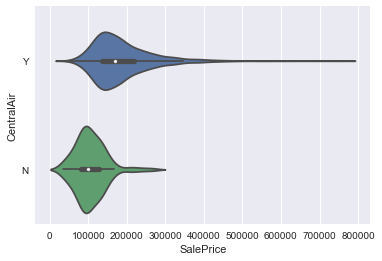

In [9]:
#visualize distributions
sns.violinplot(x="SalePrice", y="CentralAir", data=df);

**Comments**
1. Complete data
2. Each category has at least 5% observations 
3. For new data when testing, impute missing as "N"

### 2. Electrical [categorical]

In [10]:
#check how values look like
df['Electrical'].head()

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

In [11]:
group_el = df.groupby('Electrical')

In [12]:
#check number of observations per subcategory
group_el.size()

Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1334
dtype: int64

In [17]:
#percentage 
print(round(100*group_el.size()/m,1))

Electrical
FuseA     6.4
FuseF     1.8
FuseP     0.2
Mix       0.1
SBrkr    91.4
dtype: float64


In [13]:
#make sure they add up to 1460
group_el.size().sum()

1459

In [14]:
#summary statistics for price per category
group_el.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])['SalePrice']

,count,sum,min,max,mean,std
Electrical,,,,,,
FuseA,94,11486508,34900,239000,122196.893617,37511.376615
FuseF,27,2907237,39300,169500,107675.444444,30636.507376
FuseP,3,292000,73000,137000,97333.333333,34645.827070
Mix,1,67000,67000,67000,67000.000000,NaN
SBrkr,1334,249224701,37900,755000,186825.113193,79856.458326


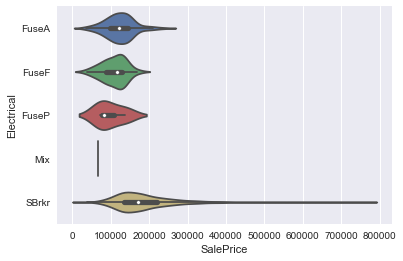

In [15]:
temp = df.Electrical.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=df)

In [16]:
stats.f_oneway(df.SalePrice[df.Electrical == 'FuseA'],
              df.SalePrice[df.Electrical == 'FuseF'],
              df.SalePrice[df.Electrical == 'FuseP'],
              df.SalePrice[df.Electrical == 'Mix'],
              df.SalePrice[df.Electrical == 'SBrkr'])

F_onewayResult(statistic=23.06767302405713, pvalue=1.6632487814737638e-18)

**Comments**
1. Some subcategories have very few observations (<5%) 
2. The subcategories do not add up to 1460.
3. Need to "collapse" some categories e.g. reduce to two subcategories: SBrkr vs Others (including missing)
4. For new data when testing, impute missing as "Other"

### 3. 1stFlrSF [continuous]

In [18]:
df['1stFlrSF'].head()

0     856
1    1262
2     920
3     961
4    1145
Name: 1stFlrSF, dtype: int64

In [19]:
df['1stFlrSF'].count()

1460

In [20]:
round(df['1stFlrSF'].describe(),1)

count    1460.0
mean     1162.6
std       386.6
min       334.0
25%       882.0
50%      1087.0
75%      1391.2
max      4692.0
Name: 1stFlrSF, dtype: float64

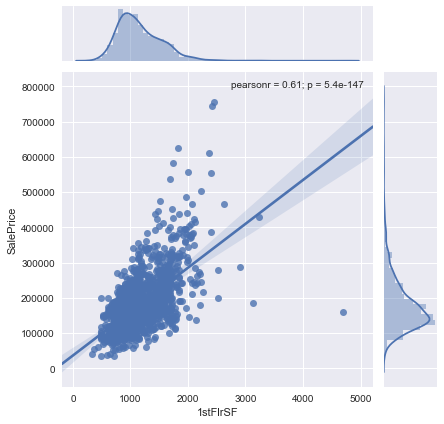

In [21]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=df, kind="reg");

**Comments**
1. Complete data 
2. Many outlying observations
3. Marginal distributions are skewed
4. For new data when testing, impute missing as the mean

### 4. 2ndFlrSF [continuous]

In [66]:
df['2ndFlrSF'].head()

0     854
1       0
2     866
3     756
4    1053
Name: 2ndFlrSF, dtype: int64

In [68]:
df['2ndFlrSF'].count()

1460

In [64]:
round(df['2ndFlrSF'].describe(),1)

count    1460.0
mean      347.0
std       436.5
min         0.0
25%         0.0
50%         0.0
75%       728.0
max      2065.0
Name: 2ndFlrSF, dtype: float64

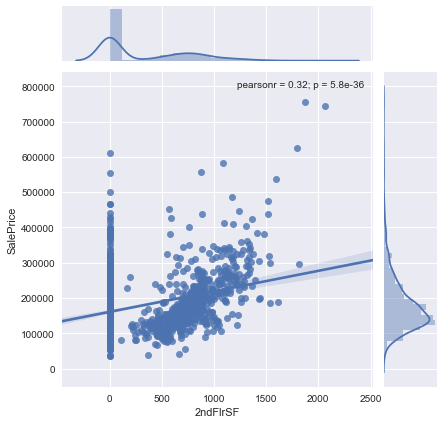

In [69]:
sns.jointplot(x='2ndFlrSF', y='SalePrice', data=df, kind="reg");

**Comments**
1. Complete data 
2. Many outlying observations
3. Marginal distributions are skewed and bimodal for 2ndFlrSF
4. Many zeroes that are influential on linear fit
5. Combine with 1stFlrSF
6. For new data when testing, impute missing as the mean

### 5. LowQualFinSF [continuous]

In [34]:
df['LowQualFinSF'].head()

0    0
1    0
2    0
3    0
4    0
Name: LowQualFinSF, dtype: int64

In [35]:
df['LowQualFinSF'].count()

1460

In [36]:
round(df['LowQualFinSF'].describe(),1)

count    1460.0
mean        5.8
std        48.6
min         0.0
25%         0.0
50%         0.0
75%         0.0
max       572.0
Name: LowQualFinSF, dtype: float64

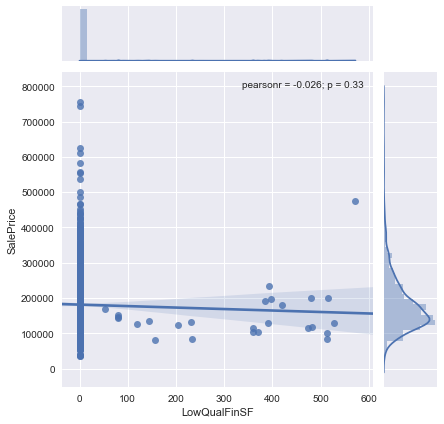

In [37]:
sns.jointplot(x='LowQualFinSF', y='SalePrice', data=df, kind="reg");

In [38]:
#percentage missing
print(str(round(100*(df[df['LowQualFinSF']==0]['LowQualFinSF'].count()/m),1))+"%")

98.2%


**Comments**
1. Many outlying observations
3. Marginal distributions are skewed 
4. Too many zeroes
5. Consider excluding
6. For new data when testing, exclude feature 

### 6. GrLivArea [continuous]

In [82]:
df['GrLivArea'].head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

In [83]:
df['GrLivArea'].count()

1460

In [84]:
round(df['GrLivArea'].describe(),1)

count    1460.0
mean     1515.5
std       525.5
min       334.0
25%      1129.5
50%      1464.0
75%      1776.8
max      5642.0
Name: GrLivArea, dtype: float64

In [33]:
round(df['GrLivArea'].median(),1)

1464.0

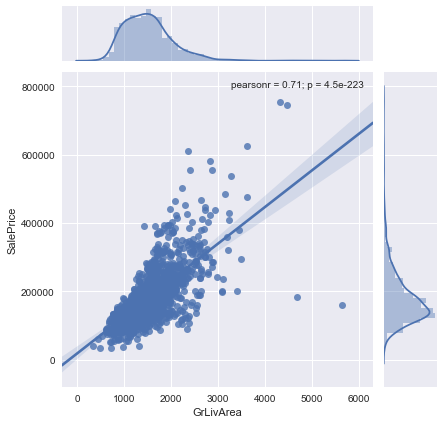

In [85]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=df, kind="reg");

**Comments**
1. Complete data 
2. Many outlying observations
3. Marginal distributions are skewed 
4. For new data when testing, impute missing as the mean

### - check with 1stFlrSF and 2ndFlrSF

In [29]:
df['1st2ndFlrSF'] = df['1stFlrSF'] + df['2ndFlrSF']

df[['GrLivArea','1st2ndFlrSF','1stFlrSF','2ndFlrSF']].head()

,GrLivArea,1st2ndFlrSF,1stFlrSF,2ndFlrSF
0,1710,1710,856,854
1,1262,1262,1262,0
2,1786,1786,920,866
3,1717,1717,961,756
4,2198,2198,1145,1053


In [32]:
#There are houses with 3rd floors?
sum(df['GrLivArea'] != df['1st2ndFlrSF'])

26

In [28]:
df[df['GrLivArea'] != df['1st2ndFlrSF']][['GrLivArea','1st2ndFlrSF','1stFlrSF','2ndFlrSF']].head()

,GrLivArea,1st2ndFlrSF,1stFlrSF,2ndFlrSF
51,1176,816,816,0
88,1526,1013,1013,0
125,754,520,520,0
170,1382,854,854,0
185,3608,3036,1518,1518


### 7. BsmtFullBath

In [87]:
df['BsmtFullBath'].head()

0    1
1    0
2    1
3    1
4    1
Name: BsmtFullBath, dtype: int64

In [88]:
df['BsmtFullBath'].count()

1460

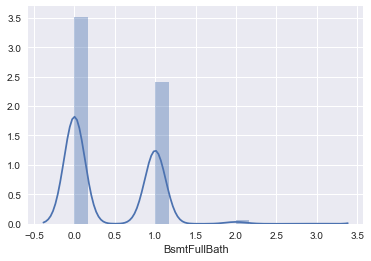

In [90]:
sns.distplot(df['BsmtFullBath']);

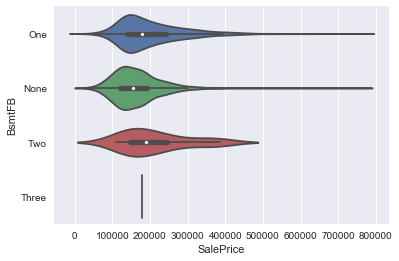

In [110]:
def categorize(x):
    if x == 0:
        return 'None'
    elif x == 1:
        return 'One'
    elif x == 2:
        return 'Two'
    else:
        return 'Three'

df['BsmtFB'] = df['BsmtFullBath'].apply(lambda x: categorize(x))
sns.violinplot(x="SalePrice", y="BsmtFB", data=df);

In [95]:
df.groupby(['BsmtFullBath'])['BsmtFullBath'].count()

BsmtFullBath
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [96]:
round(100*df.groupby(['BsmtFullBath'])['BsmtFullBath'].count()/m,1)

BsmtFullBath
0    58.6
1    40.3
2     1.0
3     0.1
Name: BsmtFullBath, dtype: float64

**Comments**
1. Complete data 
2. Too few observations for 2 or 3 full baths
3. Create new categories as NoFullBath and AtLeastOneFullBath (numerical to categorical)
4. For new data when testing, impute missing as NoFullBath

### 8. BsmtHalfBath

In [39]:
df['BsmtHalfBath'].head()

0    0
1    1
2    0
3    0
4    0
Name: BsmtHalfBath, dtype: int64

In [40]:
df['BsmtHalfBath'].count()

1460

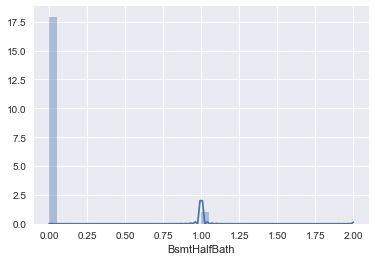

In [41]:
sns.distplot(df['BsmtHalfBath']);

In [42]:
df.groupby(['BsmtHalfBath'])['BsmtHalfBath'].count()

BsmtHalfBath
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [43]:
round(100*df.groupby(['BsmtHalfBath'])['BsmtHalfBath'].count()/m,1)

BsmtHalfBath
0    94.4
1     5.5
2     0.1
Name: BsmtHalfBath, dtype: float64

**Comments**
1. Complete data  
2. Too few observations for 1 or 2 half baths
3. Create new feature as NoHalfBath and AtLeastOneHalfBath
4. For new data when testing, impute missing as NoHalfBath
5. Consider creating new feature combining BsmtFullBath and BstmHalfBath

### 9. FullBath 

In [44]:
df['FullBath'].head()

0    2
1    2
2    2
3    1
4    2
Name: FullBath, dtype: int64

In [45]:
df['FullBath'].count()

1460

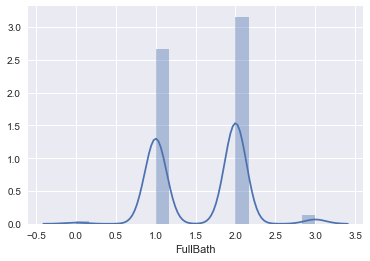

In [46]:
sns.distplot(df['FullBath']);

In [47]:
df.groupby(['FullBath'])['FullBath'].count()

FullBath
0      9
1    650
2    768
3     33
Name: FullBath, dtype: int64

In [48]:
round(100*df.groupby(['FullBath'])['FullBath'].count()/m,1)

FullBath
0     0.6
1    44.5
2    52.6
3     2.3
Name: FullBath, dtype: float64

In [51]:
#Houses with no baths above ground
df[df['FullBath']==0][['BldgType', 'HouseStyle','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']]

,BldgType,HouseStyle,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath
53,1Fam,1Story,0,1,2,0
188,Duplex,SFoyer,0,2,2,0
375,1Fam,1Story,0,1,1,0
597,TwnhsE,1Story,0,2,0,2
634,Duplex,SFoyer,0,0,2,0
916,1Fam,1Story,0,0,1,0
1163,Duplex,SFoyer,0,2,2,0
1213,1Fam,SLvl,0,0,1,1
1270,1Fam,1Story,0,1,2,0


**Comments**
1. Complete data 
2. Too few observations for 0 or 3 full baths
3. Create new feature as <=1 and >1
4. For new data when testing, impute missing as <=1
5. Consider creating new feature combining FullBath and HalfBath

### 10. HalfBath

In [52]:
df['HalfBath'].head()

0    1
1    0
2    1
3    0
4    1
Name: HalfBath, dtype: int64

In [53]:
df['HalfBath'].count()

1460

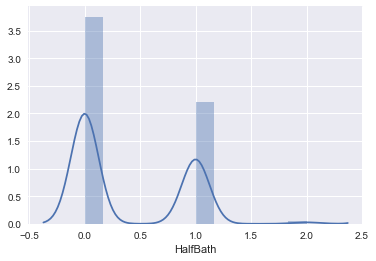

In [54]:
sns.distplot(df['HalfBath']);

In [55]:
df.groupby(['HalfBath'])['HalfBath'].count()

HalfBath
0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [56]:
round(100*df.groupby(['HalfBath'])['HalfBath'].count()/m,1)

HalfBath
0    62.5
1    36.6
2     0.8
Name: HalfBath, dtype: float64

**Comments**
1. Complete data 
2. Too few observations for 2 half baths
3. Create new feature as None or >=1
4. For new data when testing, impute missing as None
5. Consider creating new feature combining FullBath and HalfBath

### 11. BedroomAbvGr

In [116]:
df['BedroomAbvGr'].head()

0    3
1    3
2    3
3    3
4    4
Name: BedroomAbvGr, dtype: int64

In [117]:
df['BedroomAbvGr'].count()

1460

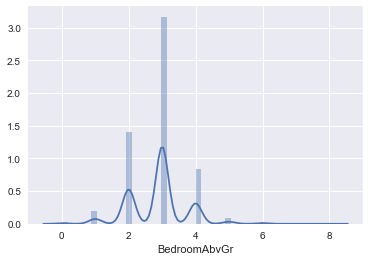

In [118]:
sns.distplot(df['BedroomAbvGr']);

In [119]:
df.groupby(['BedroomAbvGr'])['BedroomAbvGr'].count()

BedroomAbvGr
0      6
1     50
2    358
3    804
4    213
5     21
6      7
8      1
Name: BedroomAbvGr, dtype: int64

In [57]:
round(100*df.groupby(['BedroomAbvGr'])['BedroomAbvGr'].count()/m,1)

BedroomAbvGr
0     0.4
1     3.4
2    24.5
3    55.1
4    14.6
5     1.4
6     0.5
8     0.1
Name: BedroomAbvGr, dtype: float64

In [61]:
df[df['BedroomAbvGr']==0][['BldgType','HouseStyle', 'BedroomAbvGr','TotRmsAbvGrd','TotalBsmtSF','GrLivArea']]

,BldgType,HouseStyle,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,GrLivArea
53,1Fam,1Story,0,5,1842,1842
189,TwnhsE,1Story,0,5,1593,1593
634,Duplex,SFoyer,0,4,1056,1056
1163,Duplex,SFoyer,0,6,1198,1258
1213,1Fam,SLvl,0,3,648,960
1270,1Fam,1Story,0,4,1332,1524


**Comments**
1. Complete data 
2. Too few observations for 0, 1, 5+
3. Create new feature as <=2, 3, or 4+
4. For new data when testing, impute missing as <=2

### 12. KitchenAbvGr

In [62]:
df['KitchenAbvGr'].head()

0    1
1    1
2    1
3    1
4    1
Name: KitchenAbvGr, dtype: int64

In [63]:
df['KitchenAbvGr'].count()

1460

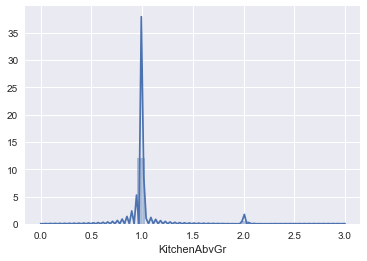

In [64]:
sns.distplot(df['KitchenAbvGr']);

In [65]:
df.groupby(['KitchenAbvGr'])['KitchenAbvGr'].count()

KitchenAbvGr
0       1
1    1392
2      65
3       2
Name: KitchenAbvGr, dtype: int64

In [66]:
round(100*df.groupby(['KitchenAbvGr'])['KitchenAbvGr'].count()/m,1)

KitchenAbvGr
0     0.1
1    95.3
2     4.5
3     0.1
Name: KitchenAbvGr, dtype: float64

In [69]:
#This one has no kitchen above ground but seems to have one in basement!
df[df['KitchenAbvGr']==0][['BldgType','HouseStyle', 'BedroomAbvGr','TotRmsAbvGrd','TotalBsmtSF','GrLivArea','KitchenQual']]

,BldgType,HouseStyle,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,GrLivArea,KitchenQual
954,Duplex,SFoyer,4,4,945,980,TA


**Comments**
1. Complete data 
2. Too few observations for 0, 2, 3
3. Create new feature as AtMostOne or TwoOrMore
4. For new data when testing, impute missing as AtMostOne
5. Consider excluding feature

### 13. KitchenQual

In [70]:
df['KitchenQual'].head()

0    Gd
1    TA
2    Gd
3    Gd
4    Gd
Name: KitchenQual, dtype: object

In [71]:
df['KitchenQual'].count()

1460

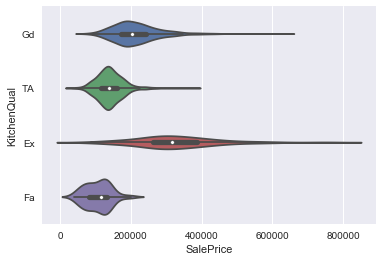

In [72]:
sns.violinplot(x="SalePrice", y="KitchenQual", data=df);

In [73]:
df.groupby(['KitchenQual'])['KitchenQual'].count()

KitchenQual
Ex    100
Fa     39
Gd    586
TA    735
Name: KitchenQual, dtype: int64

In [74]:
round(100*df.groupby(['KitchenQual'])['KitchenQual'].count()/m,1)

KitchenQual
Ex     6.8
Fa     2.7
Gd    40.1
TA    50.3
Name: KitchenQual, dtype: float64

**Comments**
1. Complete data 
2. Too few observations for Fa
3. Create new feature as Ex, Gd, Other OR GdorBetter and Other
4. For new data when testing, impute missing as Other

### 14. TotRmsAbvGrd

In [75]:
df['TotRmsAbvGrd'].head()

0    8
1    6
2    6
3    7
4    9
Name: TotRmsAbvGrd, dtype: int64

In [76]:
df['TotRmsAbvGrd'].count()

1460

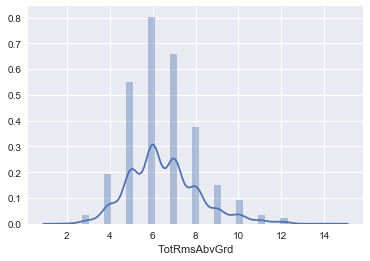

In [77]:
sns.distplot(df['TotRmsAbvGrd']);

In [78]:
df.groupby(['TotRmsAbvGrd'])['TotRmsAbvGrd'].count()

TotRmsAbvGrd
2       1
3      17
4      97
5     275
6     402
7     329
8     187
9      75
10     47
11     18
12     11
14      1
Name: TotRmsAbvGrd, dtype: int64

In [79]:
round(100*df.groupby(['TotRmsAbvGrd'])['TotRmsAbvGrd'].count()/m,1)

TotRmsAbvGrd
2      0.1
3      1.2
4      6.6
5     18.8
6     27.5
7     22.5
8     12.8
9      5.1
10     3.2
11     1.2
12     0.8
14     0.1
Name: TotRmsAbvGrd, dtype: float64

**Comments**
1. Complete data  
2. Too few observations for many subcategories
3. Create new feature as <=4, 5, 6, 7, >=8 OR <=5, 6, 7, >=8
4. For new data when testing, impute missing as <=4 OR 5

### 15. Functional

In [80]:
df['Functional'].head()

0    Typ
1    Typ
2    Typ
3    Typ
4    Typ
Name: Functional, dtype: object

In [81]:
df['Functional'].count()

1460

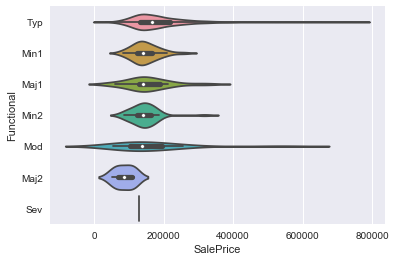

In [82]:
sns.violinplot(x="SalePrice", y="Functional", data=df);

In [83]:
df.groupby(['Functional'])['Functional'].count()

Functional
Maj1      14
Maj2       5
Min1      31
Min2      34
Mod       15
Sev        1
Typ     1360
Name: Functional, dtype: int64

In [84]:
round(100*df.groupby(['Functional'])['Functional'].count()/m,1)

Functional
Maj1     1.0
Maj2     0.3
Min1     2.1
Min2     2.3
Mod      1.0
Sev      0.1
Typ     93.2
Name: Functional, dtype: float64

**Comments**
1. Complete data 
2. Too few observations for many subcategories
3. Create new feature as Typ and Other
4. For new data when testing, impute missing as Other

### 16. Fireplaces

In [85]:
df['Fireplaces'].head()

0    0
1    1
2    1
3    1
4    1
Name: Fireplaces, dtype: int64

In [86]:
df['Fireplaces'].count()

1460

In [87]:
df.groupby(['Fireplaces'])['Fireplaces'].count()

Fireplaces
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [88]:
round(100*df.groupby(['Fireplaces'])['Fireplaces'].count()/m,1)

Fireplaces
0    47.3
1    44.5
2     7.9
3     0.3
Name: Fireplaces, dtype: float64

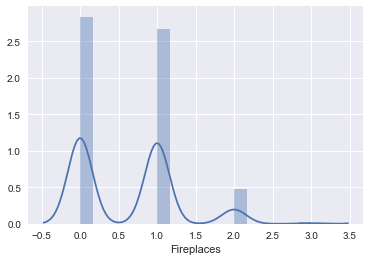

In [89]:
sns.distplot(df['Fireplaces']);

**Comments**
1. Complete data 
2. Too few observations for 3 fireplaces
3. Create new categories as Fireplace and NoFireplace
4. For new data when testing, impute missing as NoFireplace

### 17. FireplaceQu

In [90]:
df['FireplaceQu'].head()

0    NaN
1     TA
2     TA
3     Gd
4     TA
Name: FireplaceQu, dtype: object

In [91]:
df['FireplaceQu'].count()

770

In [92]:
round(100*df['FireplaceQu'].count()/m,1)

52.7

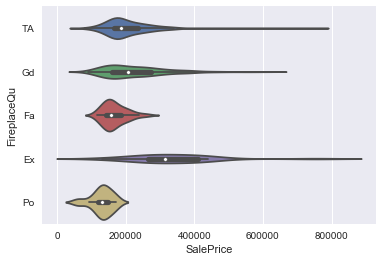

In [93]:
sns.violinplot(x="SalePrice", y="FireplaceQu", data=df);

In [94]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count()

FireplaceQu
Ex     24
Fa     33
Gd    380
Po     20
TA    313
Name: FireplaceQu, dtype: int64

In [95]:
round(100*df.groupby(['FireplaceQu'])['FireplaceQu'].count()/m,1)

FireplaceQu
Ex     1.6
Fa     2.3
Gd    26.0
Po     1.4
TA    21.4
Name: FireplaceQu, dtype: float64

In [99]:
df[df['Fireplaces']==0]['Fireplaces'].count()

690

In [104]:
round(100*df[df['Fireplaces']==0]['Fireplaces'].count()/m,1)

47.3

In [102]:
df[df['FireplaceQu'].isnull()]['Fireplaces'].count()

690

**Comments**
1. Complete data but many NaN's
2. Create 3 new categories: Gd+Ex, Others, Missing

### 18. GarageType

In [156]:
df['GarageType'].head()

0    Attchd
1    Attchd
2    Attchd
3    Detchd
4    Attchd
Name: GarageType, dtype: object

In [157]:
df['GarageType'].count()

1379

In [160]:
round(100*df['GarageType'].count()/m,1)

94.5

In [158]:
df.groupby(['GarageType'])['GarageType'].count()

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: GarageType, dtype: int64

In [159]:
round(100*df.groupby(['GarageType'])['GarageType'].count()/m,1)

GarageType
2Types      0.4
Attchd     59.6
Basment     1.3
BuiltIn     6.0
CarPort     0.6
Detchd     26.5
Name: GarageType, dtype: float64

**Comments**
1. 5.5% missing data
2. One option is create new category: Attached vs Other (including missing) OR Attached, Detached, and Other

### 19. GarageYrBlt

In [165]:
df['GarageYrBlt'].head()

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

In [162]:
df['GarageYrBlt'].count()

1379

In [166]:
round(100*df['GarageYrBlt'].count()/m,1)

94.5

In [169]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

**Comments**
1. 5.5% missing data (same as GarageType)
2. Check if same as year house was built

### 20. GarageFinish

In [170]:
df['GarageFinish'].head()

0    RFn
1    RFn
2    RFn
3    Unf
4    RFn
Name: GarageFinish, dtype: object

In [171]:
df['GarageFinish'].count()

1379

In [172]:
df.groupby(['GarageFinish'])['GarageFinish'].count()

GarageFinish
Fin    352
RFn    422
Unf    605
Name: GarageFinish, dtype: int64

In [173]:
round(100*df.groupby(['GarageFinish'])['GarageFinish'].count()/m,1)

GarageFinish
Fin    24.1
RFn    28.9
Unf    41.4
Name: GarageFinish, dtype: float64

**Comments**
1. 5.5% missing data (same as previous...)
2. Include missing values in Unf

# ALL VARIABLES TABLES

## a. Continuous

In [10]:
pd.set_option('display.precision', 1)
print(df.describe(percentiles = [.5]).T)

                count     mean      std      min       50%       max
Id             1460.0  7.3e+02    421.6      1.0     730.5    1460.0
MSSubClass     1460.0  5.7e+01     42.3     20.0      50.0     190.0
LotFrontage    1201.0  7.0e+01     24.3     21.0      69.0     313.0
LotArea        1460.0  1.1e+04   9981.3   1300.0    9478.5  215245.0
OverallQual    1460.0  6.1e+00      1.4      1.0       6.0      10.0
OverallCond    1460.0  5.6e+00      1.1      1.0       5.0       9.0
YearBuilt      1460.0  2.0e+03     30.2   1872.0    1973.0    2010.0
YearRemodAdd   1460.0  2.0e+03     20.6   1950.0    1994.0    2010.0
MasVnrArea     1452.0  1.0e+02    181.1      0.0       0.0    1600.0
BsmtFinSF1     1460.0  4.4e+02    456.1      0.0     383.5    5644.0
BsmtFinSF2     1460.0  4.7e+01    161.3      0.0       0.0    1474.0
BsmtUnfSF      1460.0  5.7e+02    441.9      0.0     477.5    2336.0
TotalBsmtSF    1460.0  1.1e+03    438.7      0.0     991.5    6110.0
1stFlrSF       1460.0  1.2e+03    

### b. Non-numerical

In [11]:
cat = []
for c in list(df.columns):
    if c not in list(df.describe().columns):
        cat.append(c)
print(cat)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [13]:
for c in cat:
    print(100*df[c].value_counts()/m)
    print("-----------------------------")

RL         78.8
RM         14.9
FV          4.5
RH          1.1
C (all)     0.7
Name: MSZoning, dtype: float64
-----------------------------
Pave    99.6
Grvl     0.4
Name: Street, dtype: float64
-----------------------------
Grvl    3.4
Pave    2.8
Name: Alley, dtype: float64
-----------------------------
Reg    63.4
IR1    33.2
IR2     2.8
IR3     0.7
Name: LotShape, dtype: float64
-----------------------------
Lvl    89.8
Bnk     4.3
HLS     3.4
Low     2.5
Name: LandContour, dtype: float64
-----------------------------
AllPub    1.0e+02
NoSeWa    6.8e-02
Name: Utilities, dtype: float64
-----------------------------
Inside     72.1
Corner     18.0
CulDSac     6.4
FR2         3.2
FR3         0.3
Name: LotConfig, dtype: float64
-----------------------------
Gtl    94.7
Mod     4.5
Sev     0.9
Name: LandSlope, dtype: float64
-----------------------------
NAmes      15.4
CollgCr    10.3
OldTown     7.7
Edwards     6.8
Somerst     5.9
Gilbert     5.4
NridgHt     5.3
Sawyer      5.1
NWAme